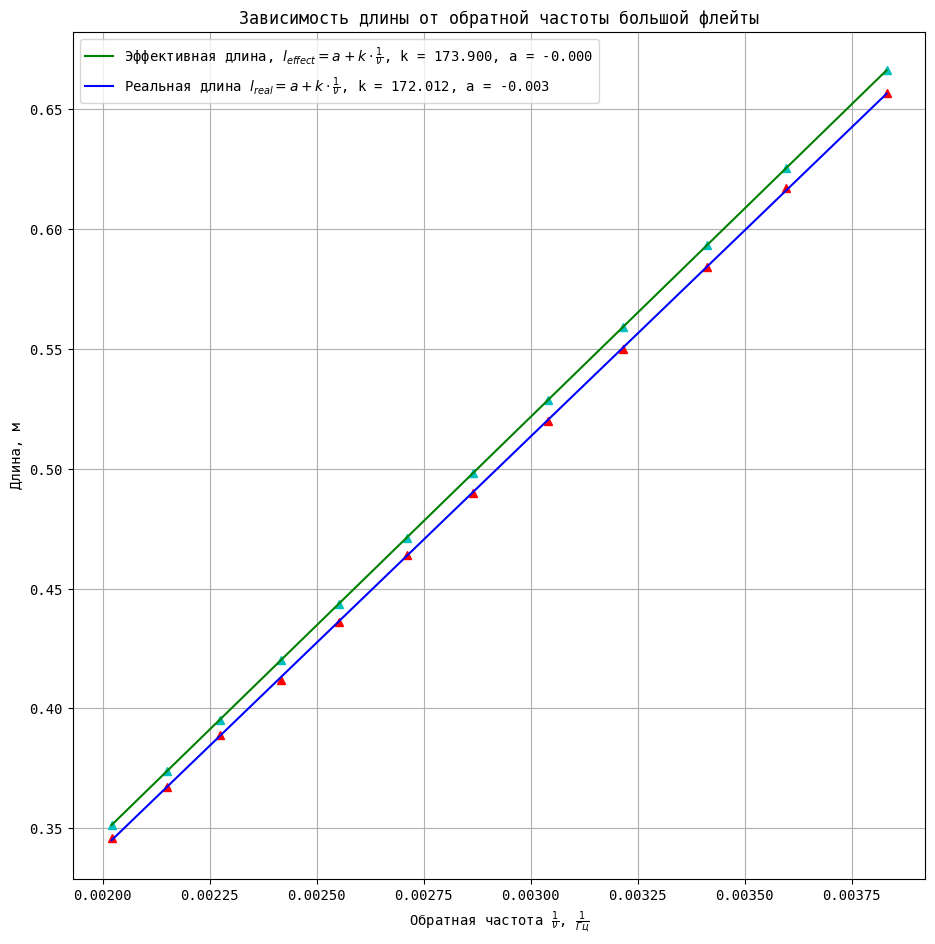

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt                     #include libs
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import numpy as np

plt.rcParams["font.family"] = "monospace"

def mapping(x, k, a):                #Function of approximating give to curve_fit
    return a + k*x

plt.figure(figsize=(11,11))                                #Create graphic in matplotlib
plt.title(r"Зависимость длины от обратной частоты большой флейты")
plt.ylabel(r"Длина, м")
plt.xlabel(r"Обратная частота $\frac{1}{\nu}$, $\frac{1}{Гц}$")

#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------

#processing data

x = []
y1 = []
y2 = []

#FILE "data.txt" !!!!!!!!!!!! YOU NEED TO UPLOAD IT TO COLAB

file = open('data.txt', 'r')                 #open file with data
while (line := file.readline()):              # every line have x, y, y1 ...
  s = line.split()
  if (len(s) != 0):
    x.append(float(s[2].replace(',','.')))    #collect in x[] y1[] y2[] with change "," -> "." (if excel)
    y1.append(float(s[0].replace(',','.')))
    y2.append(float(s[1].replace(',','.')))

x.sort()
y2.sort()
y1.sort()
k1 = 0
k2 = 0
a1 = 0                                        #create coeffs all in function
a2 = 0

coeffs,_ = curve_fit(mapping, x, y1)          #give func and our measurements
k1 = coeffs[0]                                   #it returns array of aproximating coeffs
a1 = coeffs[1]
y1_fit = []
for i in range(len(x)):
  y1_fit.append(a1 + k1 * x[i])                    #with coeffs make array of Approximating data
#                 ^
#                 |
#                 function need to write
#                 """"""""""""""""""""""
coeffs,_ = curve_fit(mapping, x, y2)          #give func and our measurements
k2 = coeffs[0]                                   #it returns array of aproximating coeffs
a2 = coeffs[1]
y2_fit = []
for i in range(len(x)):
  y2_fit.append(a2 + k2 * x[i])                    #with coeffs make array of Approximating data
#                 ^
#                 |
#                 function need to write
#

plt.plot(x, y1, 'c^', label='')    #triangles with measurments
plt.plot(x, y1_fit, color = 'g', label = f"Эффективная длина, " r'$l_{effect} = a + k \cdot \frac{1}{\nu}$' f", k = {k1:.3f}, a = {a1:.3f}") #approximating praphic
plt.plot(x, y2, 'r^', label='')    #triangles with measurments
plt.plot(x, y2_fit, color = 'b', label = f"Реальная длина " r'$l_{real} = a + k \cdot \frac{1}{\nu}$' f", k = {k2:.3f}, a = {a2:.3f}") #approximating praphic

#----------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------

plt.grid(visible = True, which='major', axis='both', alpha=1)           #end of matplotlib
plt.grid(visible = True, which='minor', axis='both', alpha=1)           #show graphic
plt.legend()
plt.show()
plt.savefig('graphic.png')
file.close()